```
https://github.com/weisongwen/UrbanLoco/tree/master/calibration_CA
```

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pyquaternion
import json
import open3d as o3d
from PIL import Image
from projector import Projector
import yaml
import cv2
from pypcd import pypcd

In [11]:
# dataset:https://github.com/weisongwen/UrbanLoco
ROOT_DIR = "datas/UrbanLoco/"
IMG = ROOT_DIR + "/imgs/1567044267.650190115.jpg"
PCD = ROOT_DIR + "/pcds/1567044267.683729000.pcd"
CALIB_FILE1 = ROOT_DIR + "/calibration_CA.txt"

In [12]:
# datas/UrbanLoco/calibration_CA.txt
calibs_cam0 = {
    "extrinsic": [ -4.7324731432882849e-03, 1.2489446573634877e-02, 9.9991080473321836e-01, 1.8499563388803192e-01,
        -9.9990518155032682e-01, -1.2990043852130206e-02, -4.5701935984787667e-03, -2.4227446820327757e-02,
        1.2931806012923930e-02, -9.9983762305936663e-01, 1.2549737377333781e-02, -3.3589470159409335e-01,
        0., 0., 0., 1. ],
    "intrinsic": [ 1857.4752797615988, 0., 1039.692658811044, 
            0., 1869.2155909761746, 739.3362262994145, 
            0., 0., 1. ],
    "distortion": [ -3.0451652061637519e-01, 3.8894492749157322e-02, 1.0517466490567872e-03, -5.5095449411338973e-04, 1.7054732639063463e-01 ]
}

In [13]:
intrinsic = np.array(calibs_cam0['intrinsic']).reshape(3,3)
print(intrinsic.tolist())
distortion = np.array(calibs_cam0['distortion'])
extrinsic = np.array(calibs_cam0['extrinsic']).reshape(4,4)
# extrinsic[:, 3] = .0
# extrinsic = Projector.inverse_rigid_trans(extrinsic)
print(extrinsic)

[[1857.4752797615988, 0.0, 1039.692658811044], [0.0, 1869.2155909761746, 739.3362262994145], [0.0, 0.0, 1.0]]
[[-0.00473247  0.01248945  0.9999108   0.18499563]
 [-0.99990518 -0.01299004 -0.00457019 -0.02422745]
 [ 0.01293181 -0.99983762  0.01254974 -0.3358947 ]
 [ 0.          0.          0.          1.        ]]


In [14]:
# q = pyquaternion.Quaternion(matrix=extrinsic)
# # a rotation of +90 degrees about positive y axis
# qx = pyquaternion.Quaternion(axis=[0, 1, 0], degrees=2.5)
# new_q = qx * q
# qz = pyquaternion.Quaternion(axis=[0, 0, 1], degrees=-0.3)
# new_q = qz * new_q
# extrinsic = new_q.transformation_matrix
# extrinsic[:3, 3] = [0.18499563, -0.02422745, -0.3358947]
# print(extrinsic)

In [15]:
# imageSize = [2048, 1536]
# img = cv2.imread(IMG)
# m, _ = cv2.getOptimalNewCameraMatrix(intrinsic, distortion, imageSize, 1.0, imageSize)
# print(m)
# img_undistored = cv2.undistort(img, intrinsic, distortion, dst=None, newCameraMatrix=m)
# cv2.imwrite(IMG + "_u.png", img_undistored)
# IMG=IMG + "_u.png"

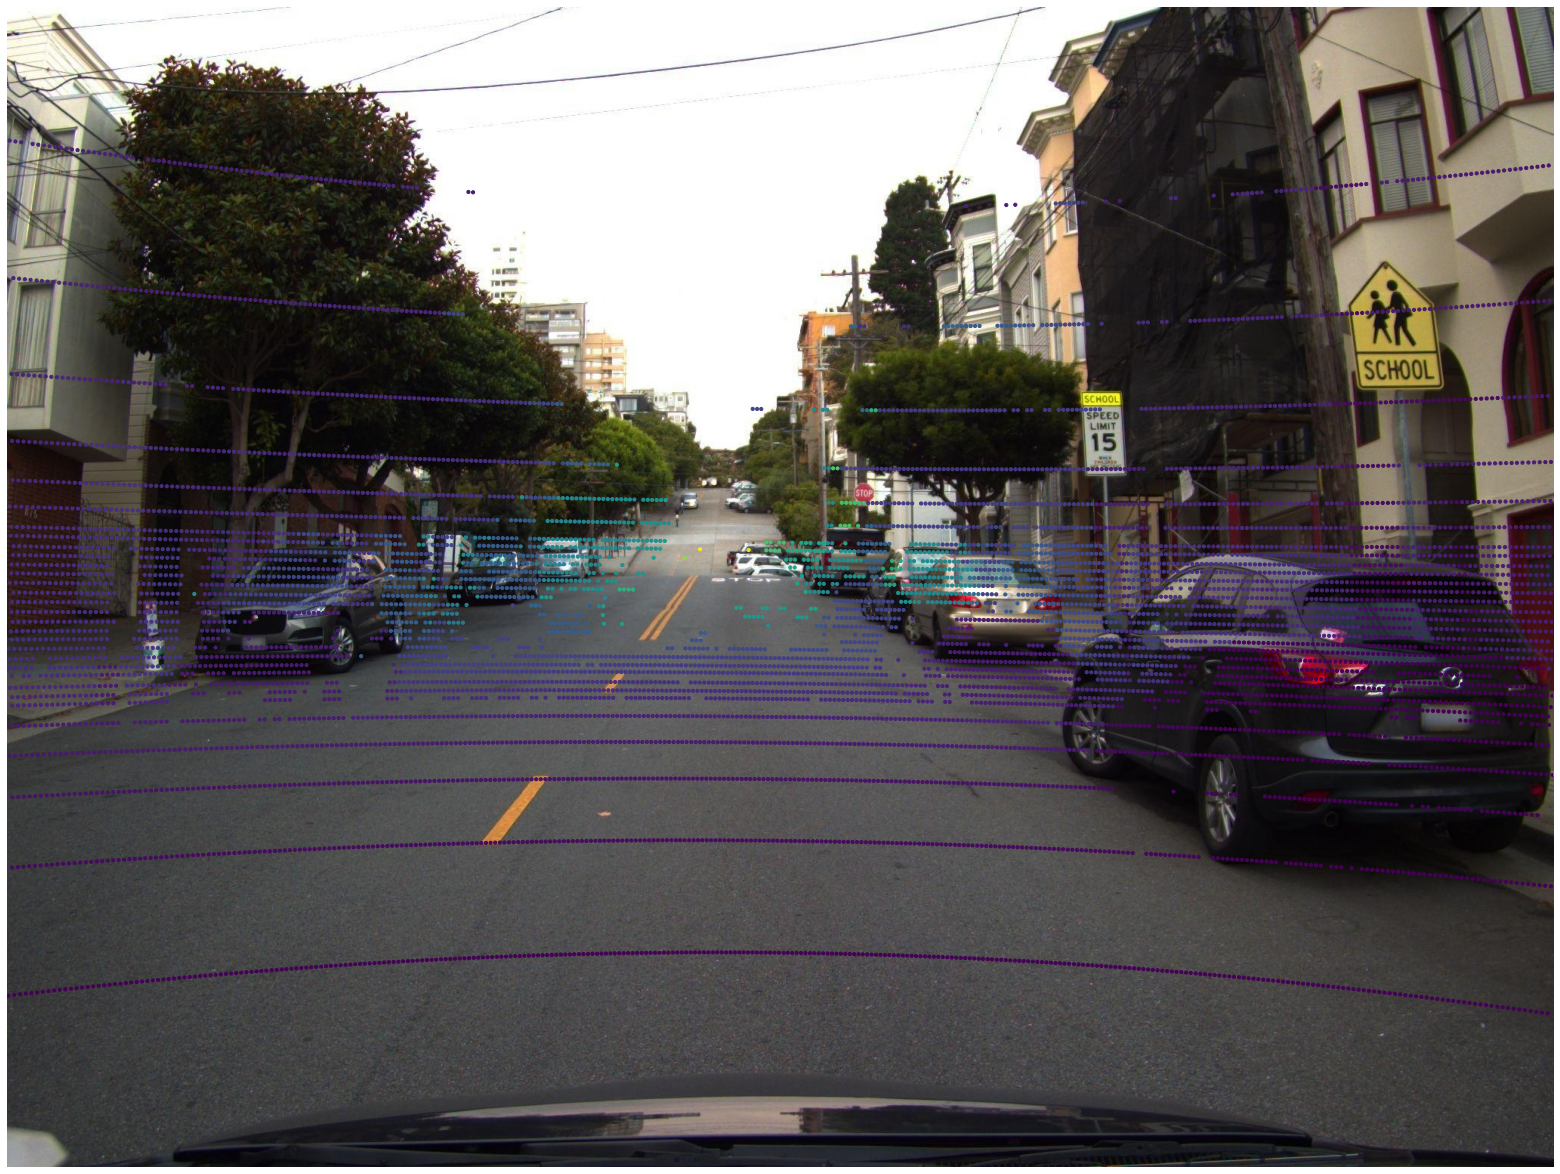

In [16]:
img = Image.open(IMG)
pcd = o3d.io.read_point_cloud(PCD)
pts = np.asarray(pcd.points) # n, 3

points, coloring = Projector.map_pointcloud_to_image(img, pts, extrinsic, intrinsic)

fig, ax = plt.subplots(1, 1)
w, h = img.size
fig.set_size_inches(w/fig.dpi, h/fig.dpi)
ax.imshow(img)
ax.scatter(points[0, :], points[1, :], c=coloring, s=10)
ax.axis('off')
plt.savefig("./imgs/point_img.png")
plt.show()

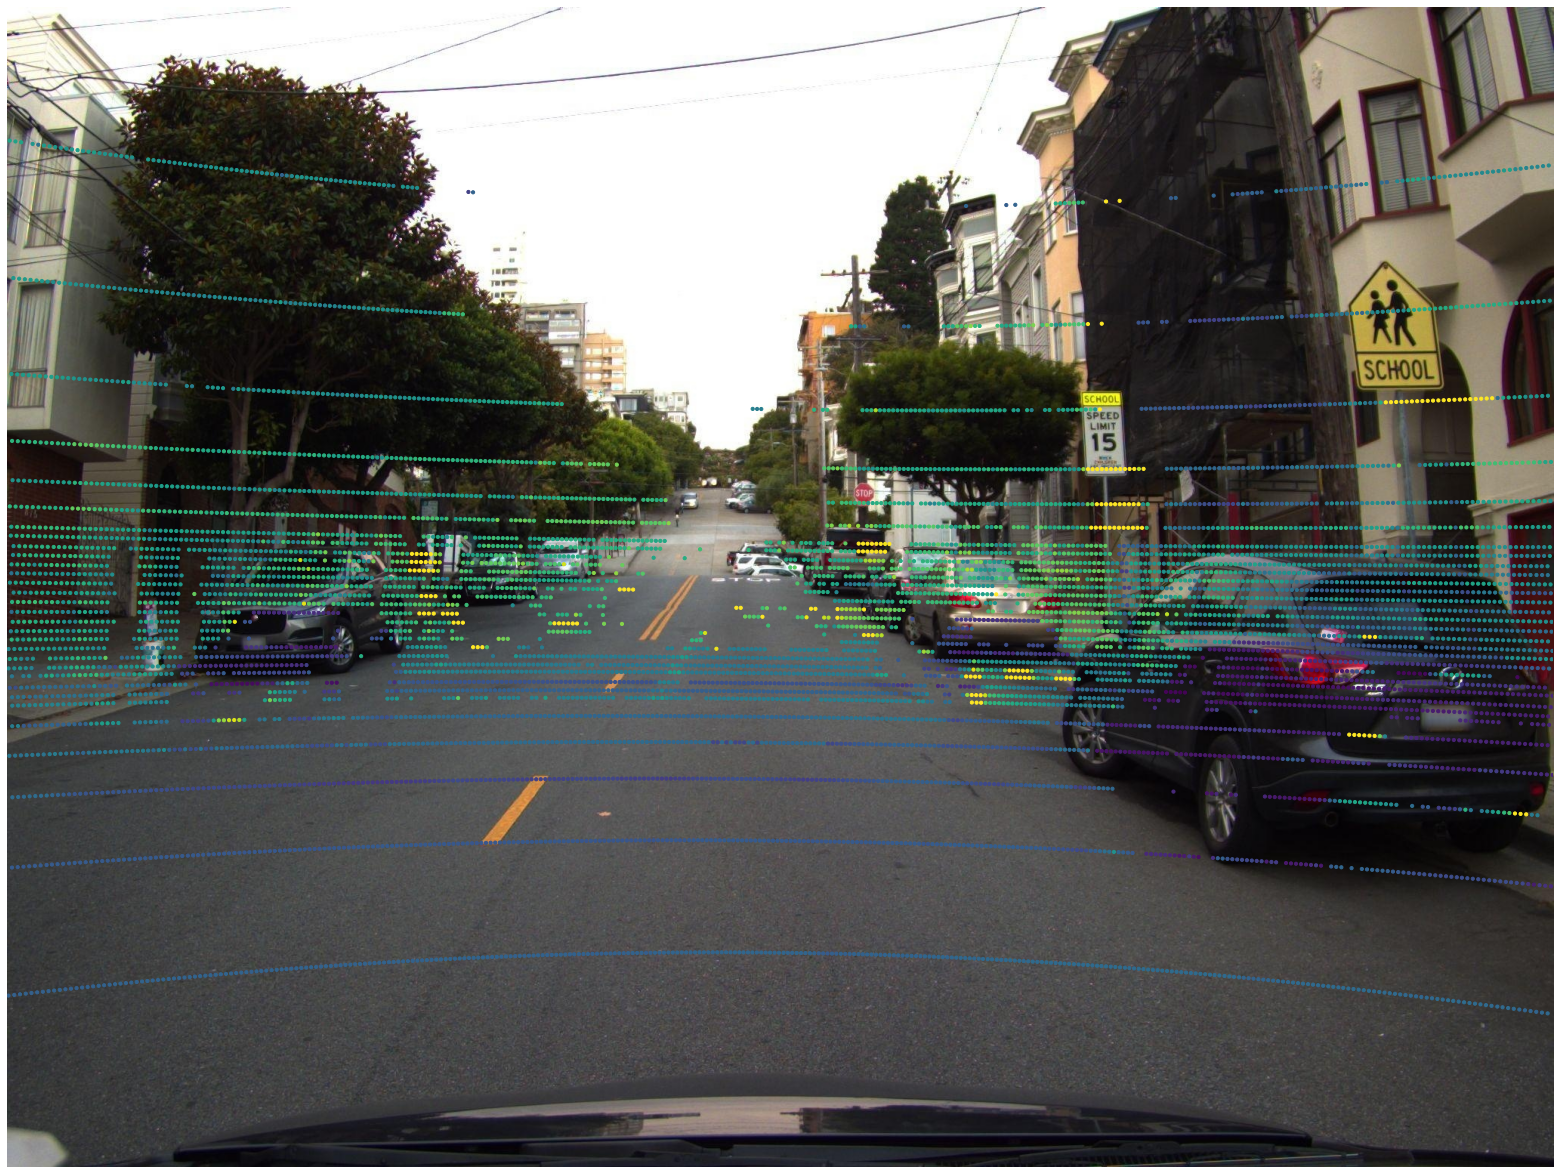

In [17]:
pc = pypcd.PointCloud.from_path(PCD)
pts = np.stack([pc.pc_data['x'], pc.pc_data['y'], pc.pc_data['z'], pc.pc_data['intensity']]).T

points, coloring = Projector.map_pointcloud_to_image(img, pts, extrinsic, intrinsic, coloring=Projector.Coloring.INTENSITY)

fig, ax = plt.subplots(1, 1)
w, h = img.size
fig.set_size_inches(w/fig.dpi, h/fig.dpi)
ax.imshow(img)
ax.scatter(points[0, :], points[1, :], c=coloring, s=10)
ax.axis('off')
plt.savefig("./imgs/point_img2.png")
plt.show()